### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Load the dataset

In [2]:
# loading the dataset
data = pd.read_csv('respiratory.csv')
#create copy of the dataset
df = data.copy()

#### Basic Information about the dataset

In [3]:
#View the first 5 rows of the dataset
df.head()

Age  Body Temperature  Respiratory Rate  Heart Rate  Cough Severity  \
0   52         39.720661                22          81               5   
1   15         38.110352                17          80               5   
2   72         37.035617                14          88               2   
3   61         36.211307                25         104               4   
4   21         38.904339                13         105               2   

   Chest Pain Severity  Oxygen Saturation  Shortness of Breath  \
0                    5          93.017309                    1   
1                    3          88.044161                    0   
2                    2          93.870347                    0   
3                    1          92.541328                    1   
4                    1          92.637838                    0   

   Sputum Production  History of Smoking  History of Respiratory Infections  \
0                  1                   0                                  1   
1                  0                   1                                  1   
2                  0                   1                                  0   
3                  0                   1                                  1   
4                  1                   1                                  1   

   Exposure to Pollutants  Early Diagnosis  
0                       0                1  
1                       0                0  
2                       0                0  
3                       1                1  
4                       0                1

In [4]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7000 non-null   int64  
 1   Body Temperature                   7000 non-null   float64
 2   Respiratory Rate                   7000 non-null   int64  
 3   Heart Rate                         7000 non-null   int64  
 4   Cough Severity                     7000 non-null   int64  
 5   Chest Pain Severity                7000 non-null   int64  
 6   Oxygen Saturation                  7000 non-null   float64
 7   Shortness of Breath                7000 non-null   int64  
 8   Sputum Production                  7000 non-null   int64  
 9   History of Smoking                 7000 non-null   int64  
 10  History of Respiratory Infections  7000 non-null   int64  
 11  Exposure to Pollutants             7000 non-null   int64

In [5]:
 #checking the chape of the dataset
df.shape

(7000, 13)

- The dataset contains 7000 rows and 13 columns

In [6]:
#basic statistics
df.describe().T

count       mean        std        min  \
Age                                7000.0  44.711143  25.604490   1.000000   
Body Temperature                   7000.0  37.982782   1.149868  36.000211   
Respiratory Rate                   7000.0  20.554286   5.235194  12.000000   
Heart Rate                         7000.0  89.302571  17.233531  60.000000   
Cough Severity                     7000.0   3.038000   1.419251   1.000000   
Chest Pain Severity                7000.0   2.994714   1.409903   1.000000   
Oxygen Saturation                  7000.0  92.435413   4.321553  85.002482   
Shortness of Breath                7000.0   0.493429   0.499993   0.000000   
Sputum Production                  7000.0   0.503286   0.500025   0.000000   
History of Smoking                 7000.0   0.502714   0.500028   0.000000   
History of Respiratory Infections  7000.0   0.503000   0.500027   0.000000   
Exposure to Pollutants             7000.0   0.507000   0.499987   0.000000   
Early Diagnosis                    7000.0   0.500714   0.500035   0.000000   

                                         25%        50%         75%  \
Age                                22.000000  45.000000   66.000000   
Body Temperature                   36.995574  37.965359   38.974052   
Respiratory Rate                   16.000000  21.000000   25.000000   
Heart Rate                         74.000000  89.000000  104.000000   
Cough Severity                      2.000000   3.000000    4.000000   
Chest Pain Severity                 2.000000   3.000000    4.000000   
Oxygen Saturation                  88.736131  92.411664   96.147180   
Shortness of Breath                 0.000000   0.000000    1.000000   
Sputum Production                   0.000000   1.000000    1.000000   
History of Smoking                  0.000000   1.000000    1.000000   
History of Respiratory Infections   0.000000   1.000000    1.000000   
Exposure to Pollutants              0.000000   1.000000    1.000000   
Early Diagnosis                     0.000000   1.000000    1.000000   

                                          max  
Age                                 89.000000  
Body Temperature                    39.998693  
Respiratory Rate                    29.000000  
Heart Rate                         119.000000  
Cough Severity                       5.000000  
Chest Pain Severity                  5.000000  
Oxygen Saturation                   99.998495  
Shortness of Breath                  1.000000  
Sputum Production                    1.000000  
History of Smoking                   1.000000  
History of Respiratory Infections    1.000000  
Exposure to Pollutants               1.000000  
Early Diagnosis                      1.000000

#### Exploratory Data Analysis

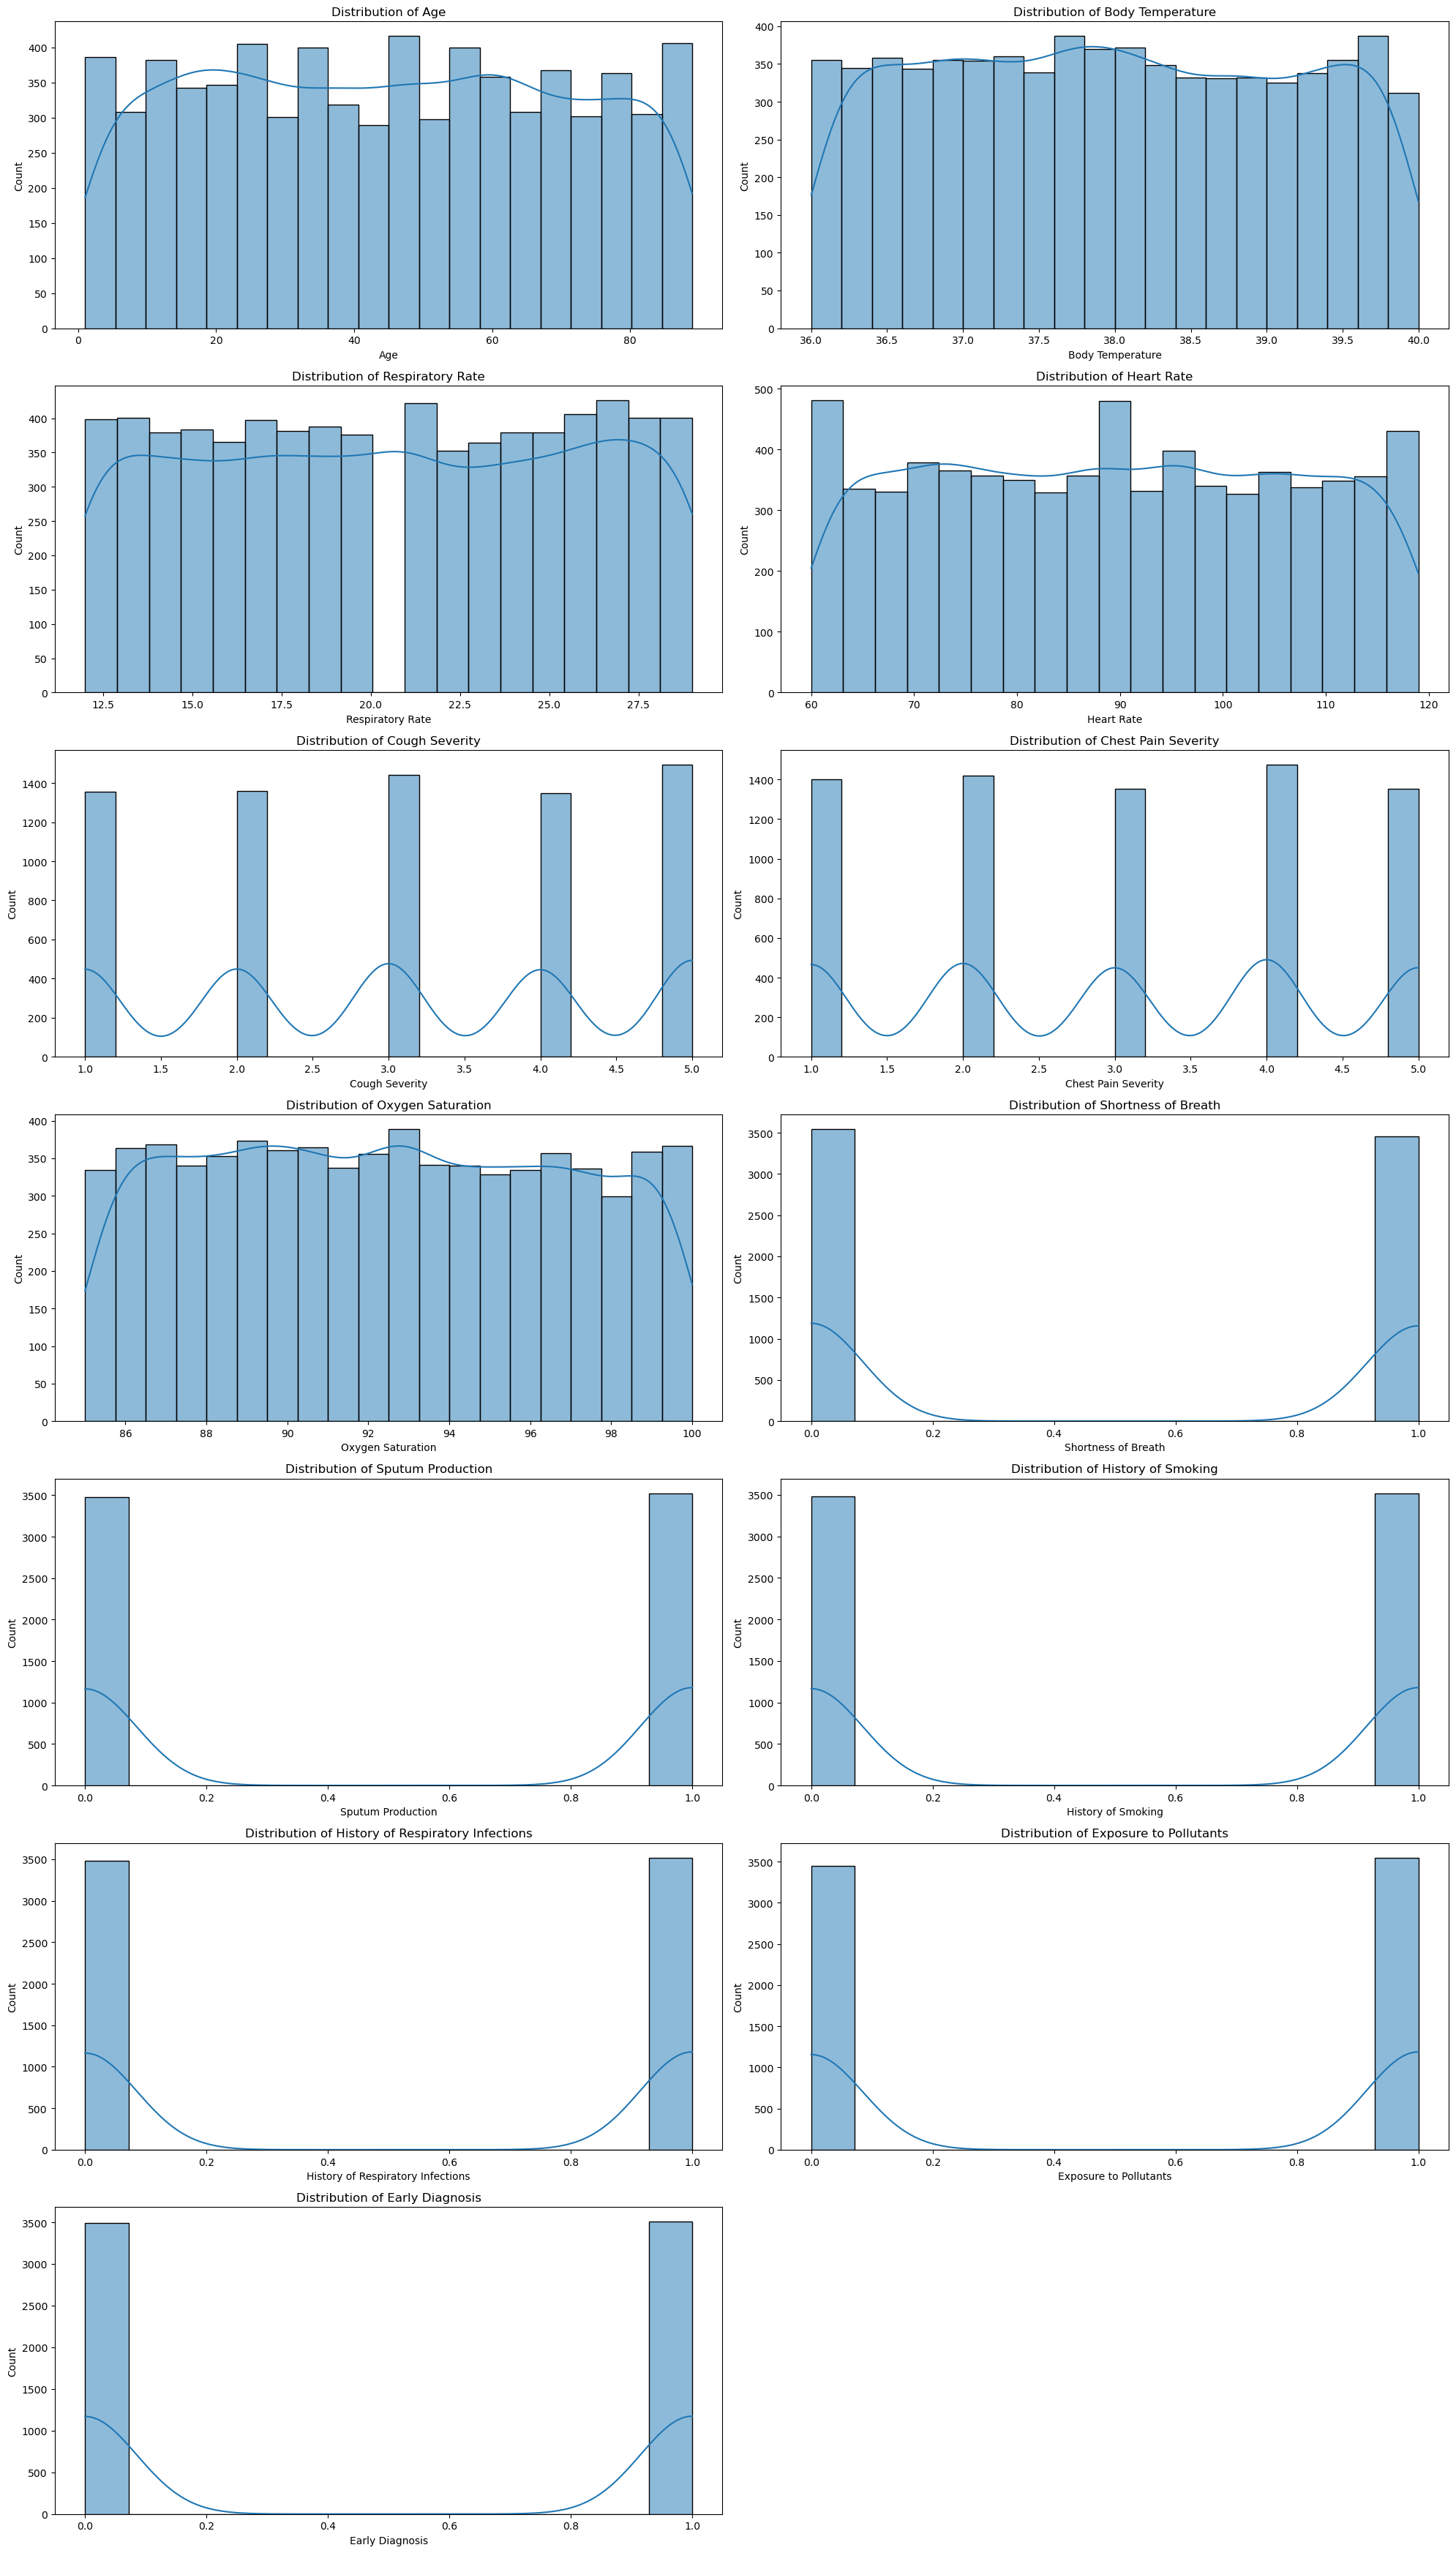

In [7]:
# Feature Distribution Plot
num_features = len(df.columns)
num_rows = math.ceil(num_features / 2)  # Calculate number of rows needed

plt.figure(figsize=(20, 5 * num_rows))

for i, column in enumerate(df.columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.savefig('feature_distributions.png')
plt.show()

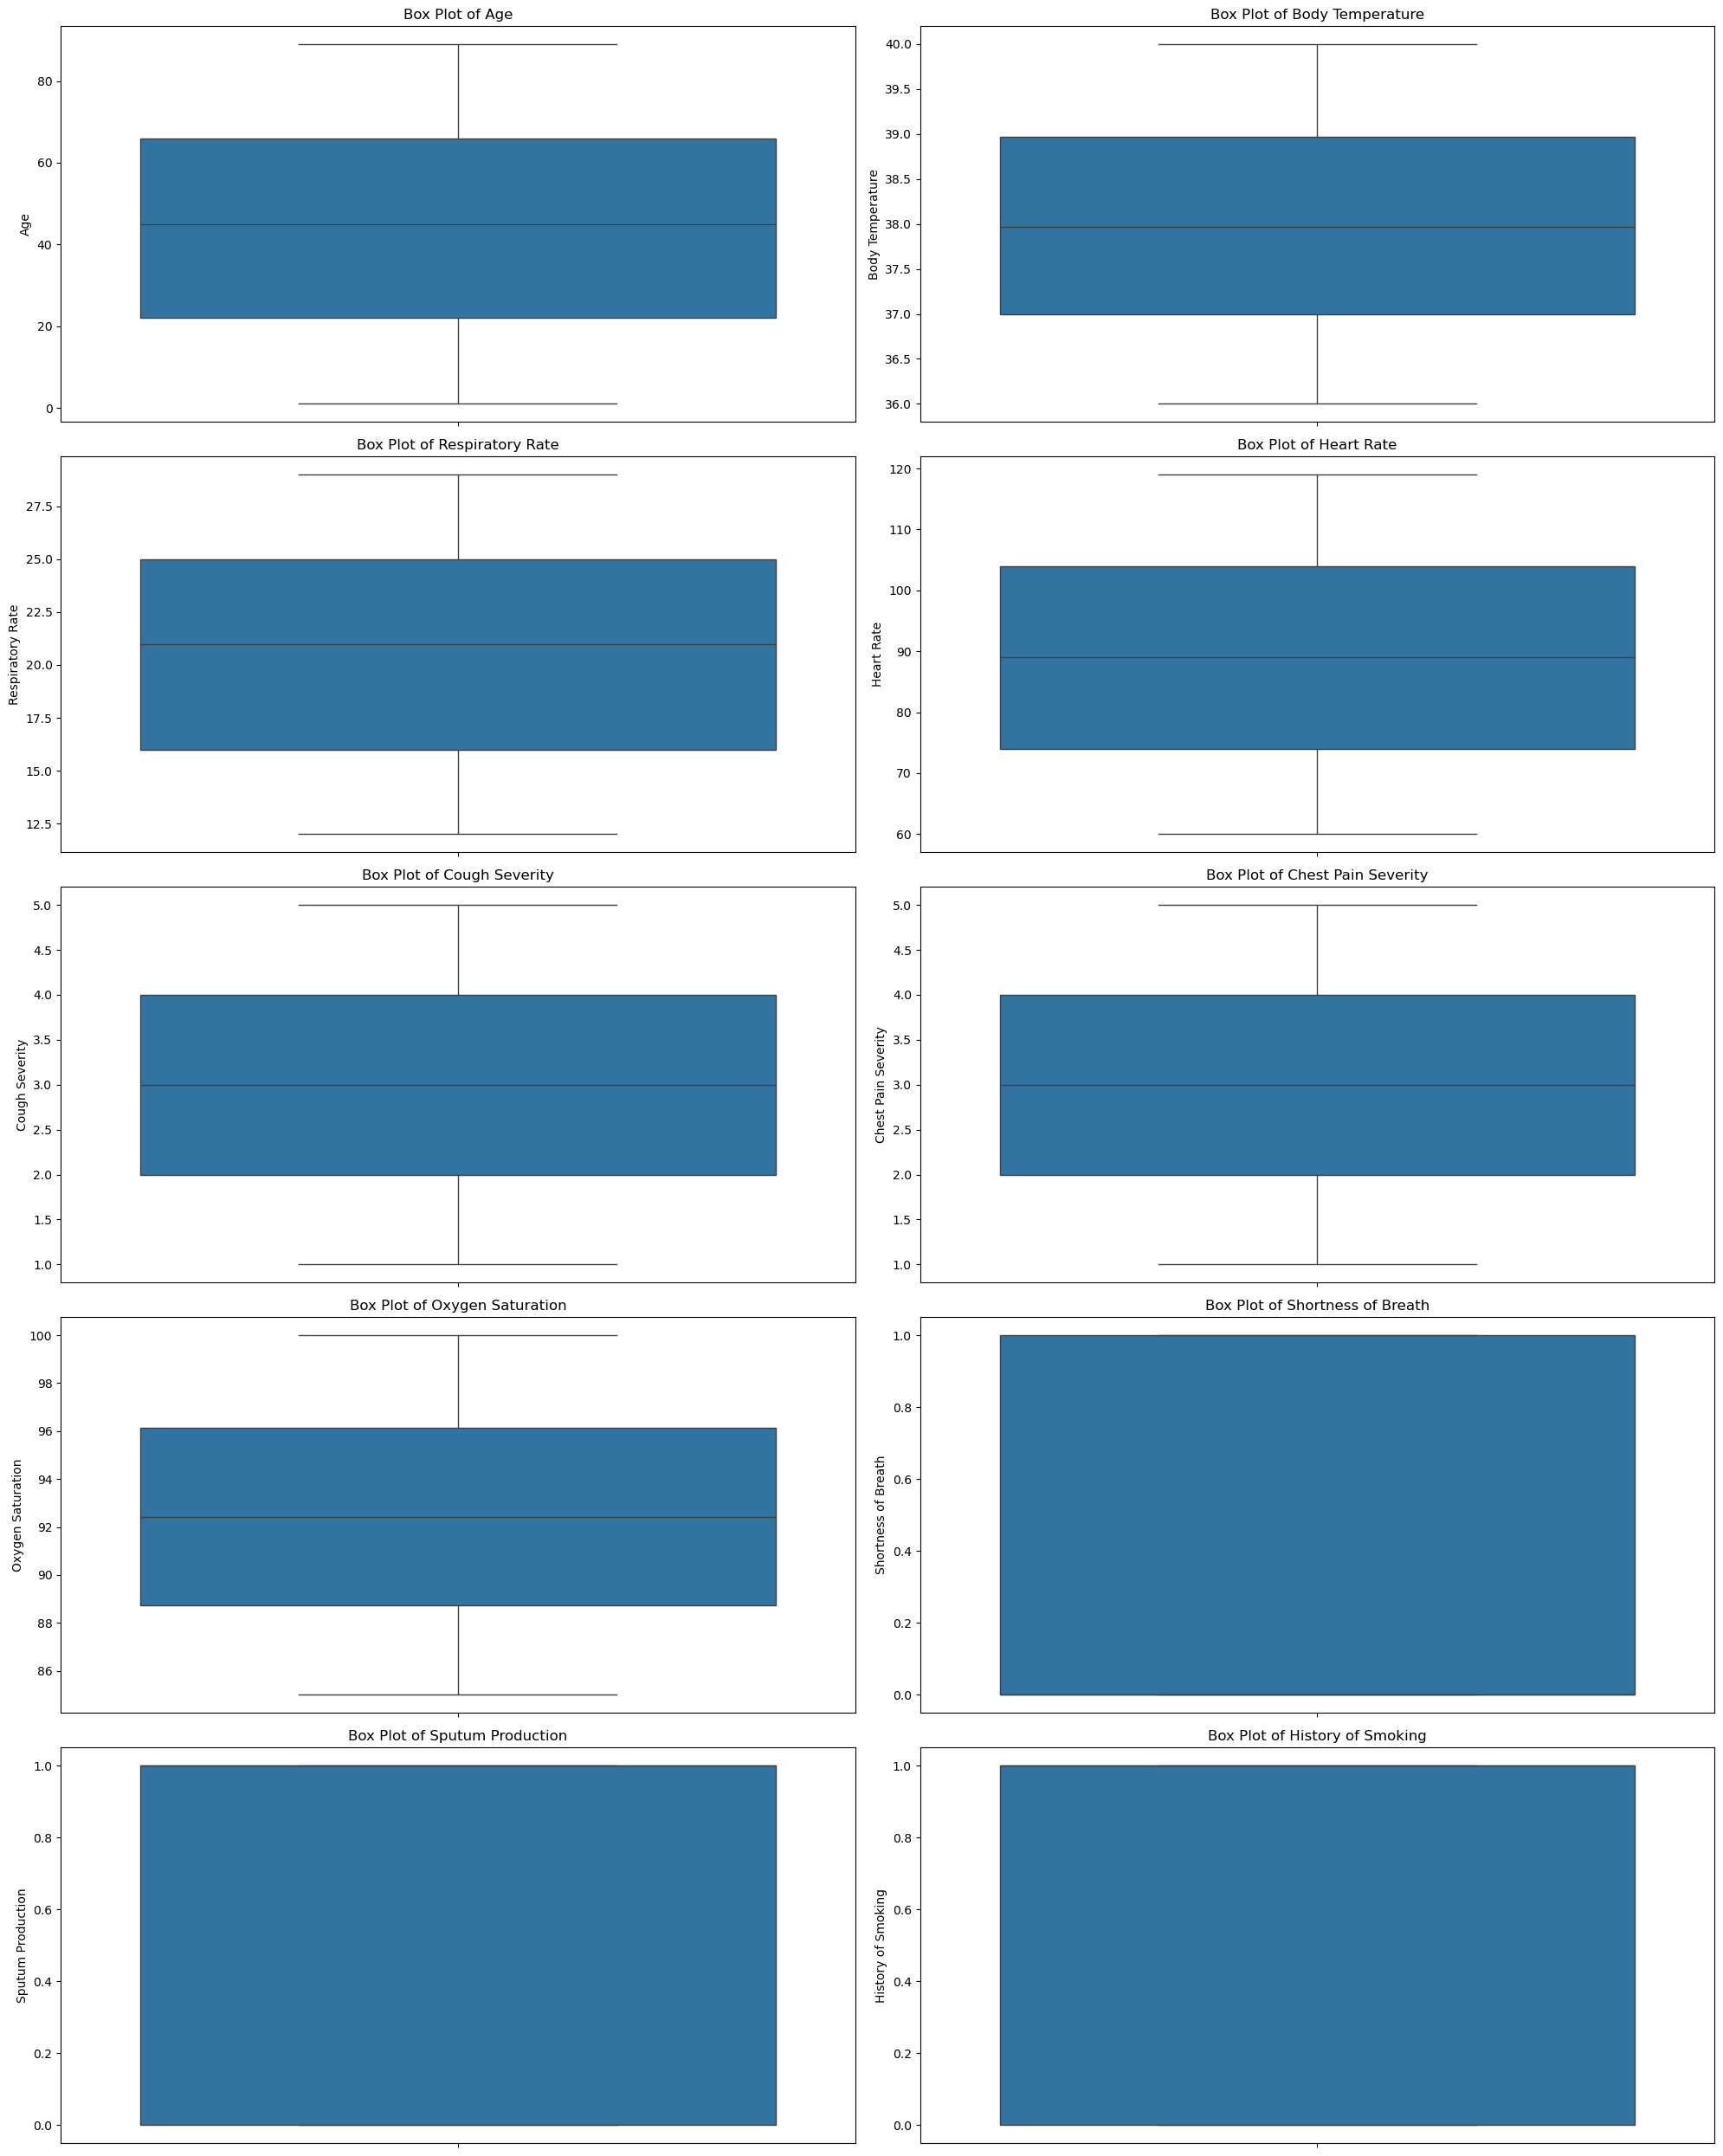

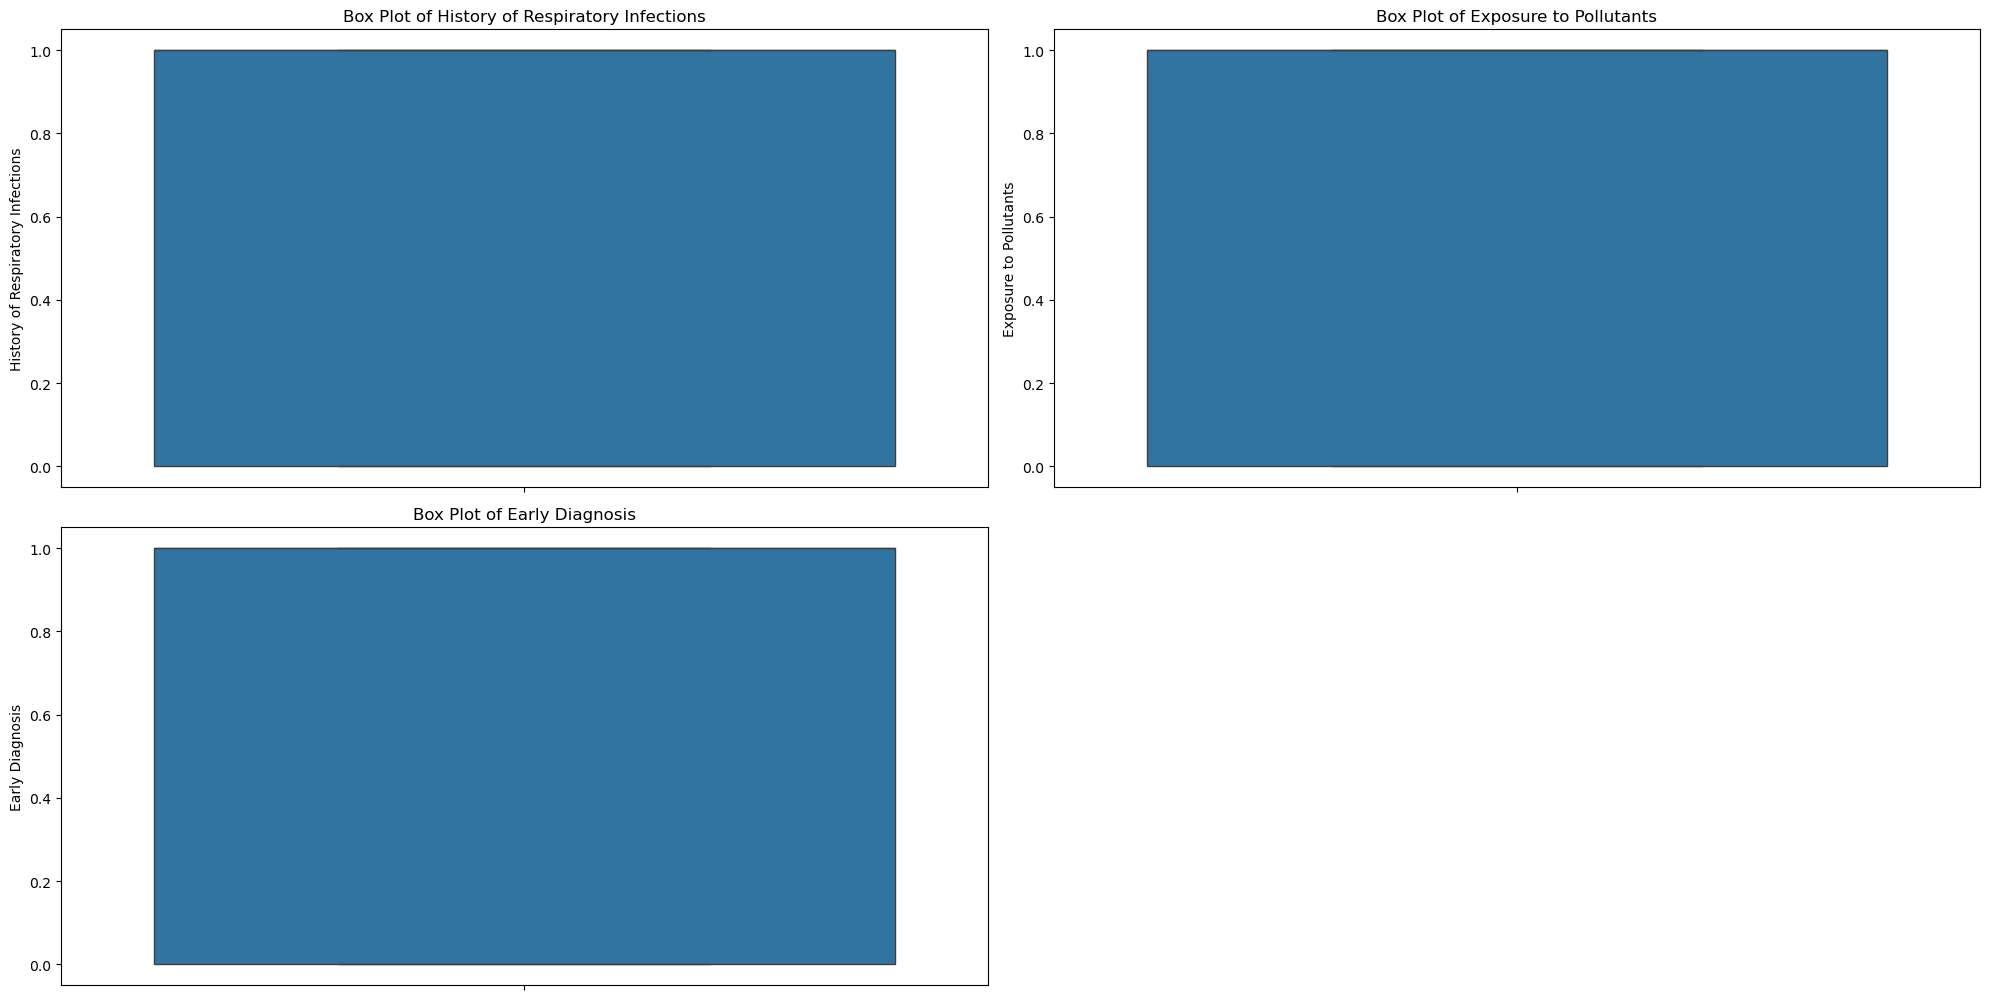

In [8]:
# Define the number of rows for each figure
num_rows = 5

# Calculate the total number of figures needed
num_columns = len(df.columns)
num_figures = (num_columns + num_rows * 2 - 1) // (num_rows * 2)

# Plot each figure separately
for fig_num in range(num_figures):
    plt.figure(figsize=(20, 5 * num_rows))
    
    start_col = fig_num * num_rows * 2
    end_col = start_col + num_rows * 2
    
    for i, column in enumerate(data.columns[start_col:end_col], 1):
        plt.subplot(num_rows, 2, i)
        sns.boxplot(y=data[column])
        plt.title(f'Box Plot of {column}')
    
    plt.tight_layout()
    plt.savefig(f'boxplots_{fig_num + 1}.png')
    plt.show()

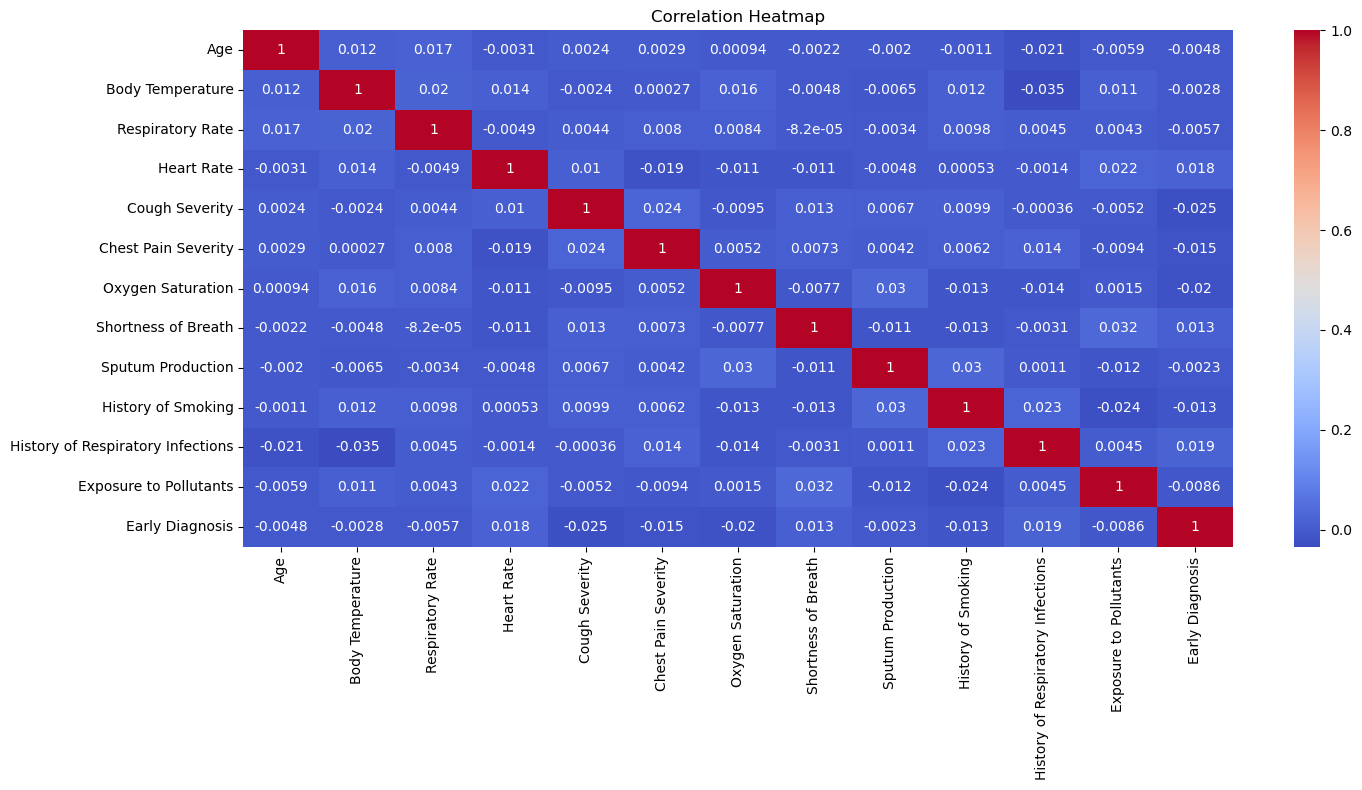

In [9]:
# Correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

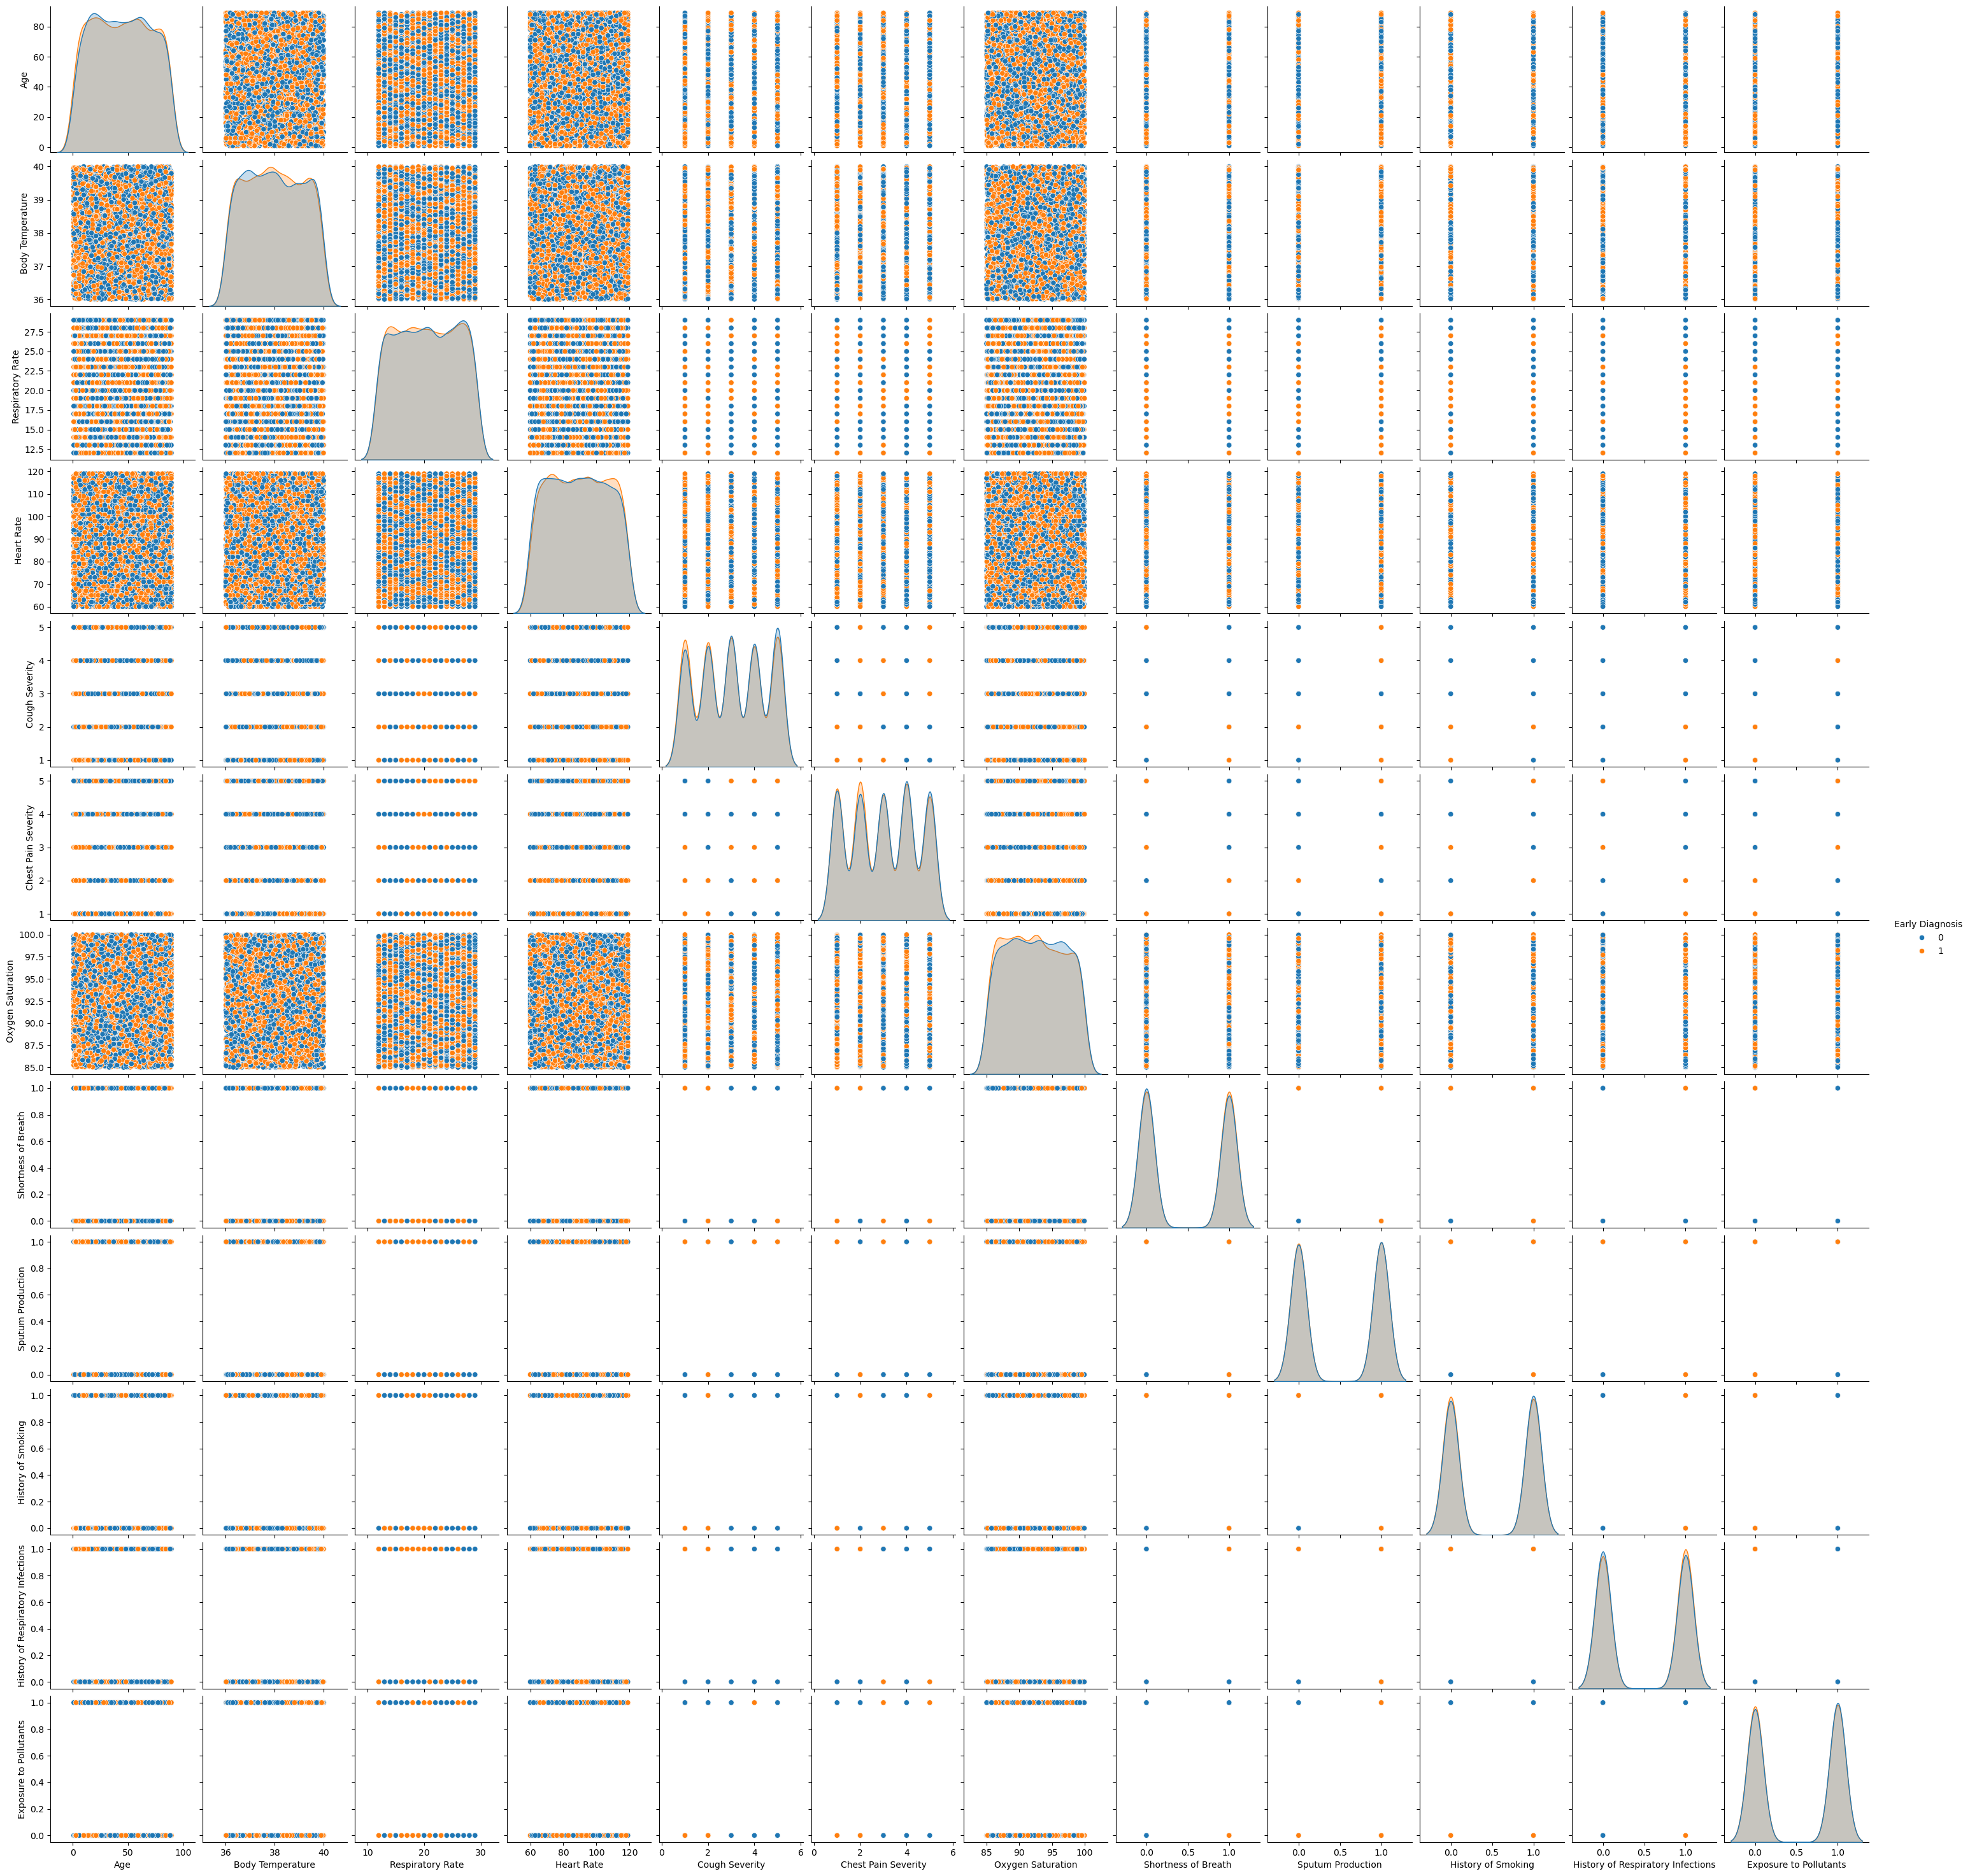

In [10]:
# Pairplot
sns.pairplot(df, hue='Early Diagnosis')
plt.savefig('pairplot.png')
plt.show()

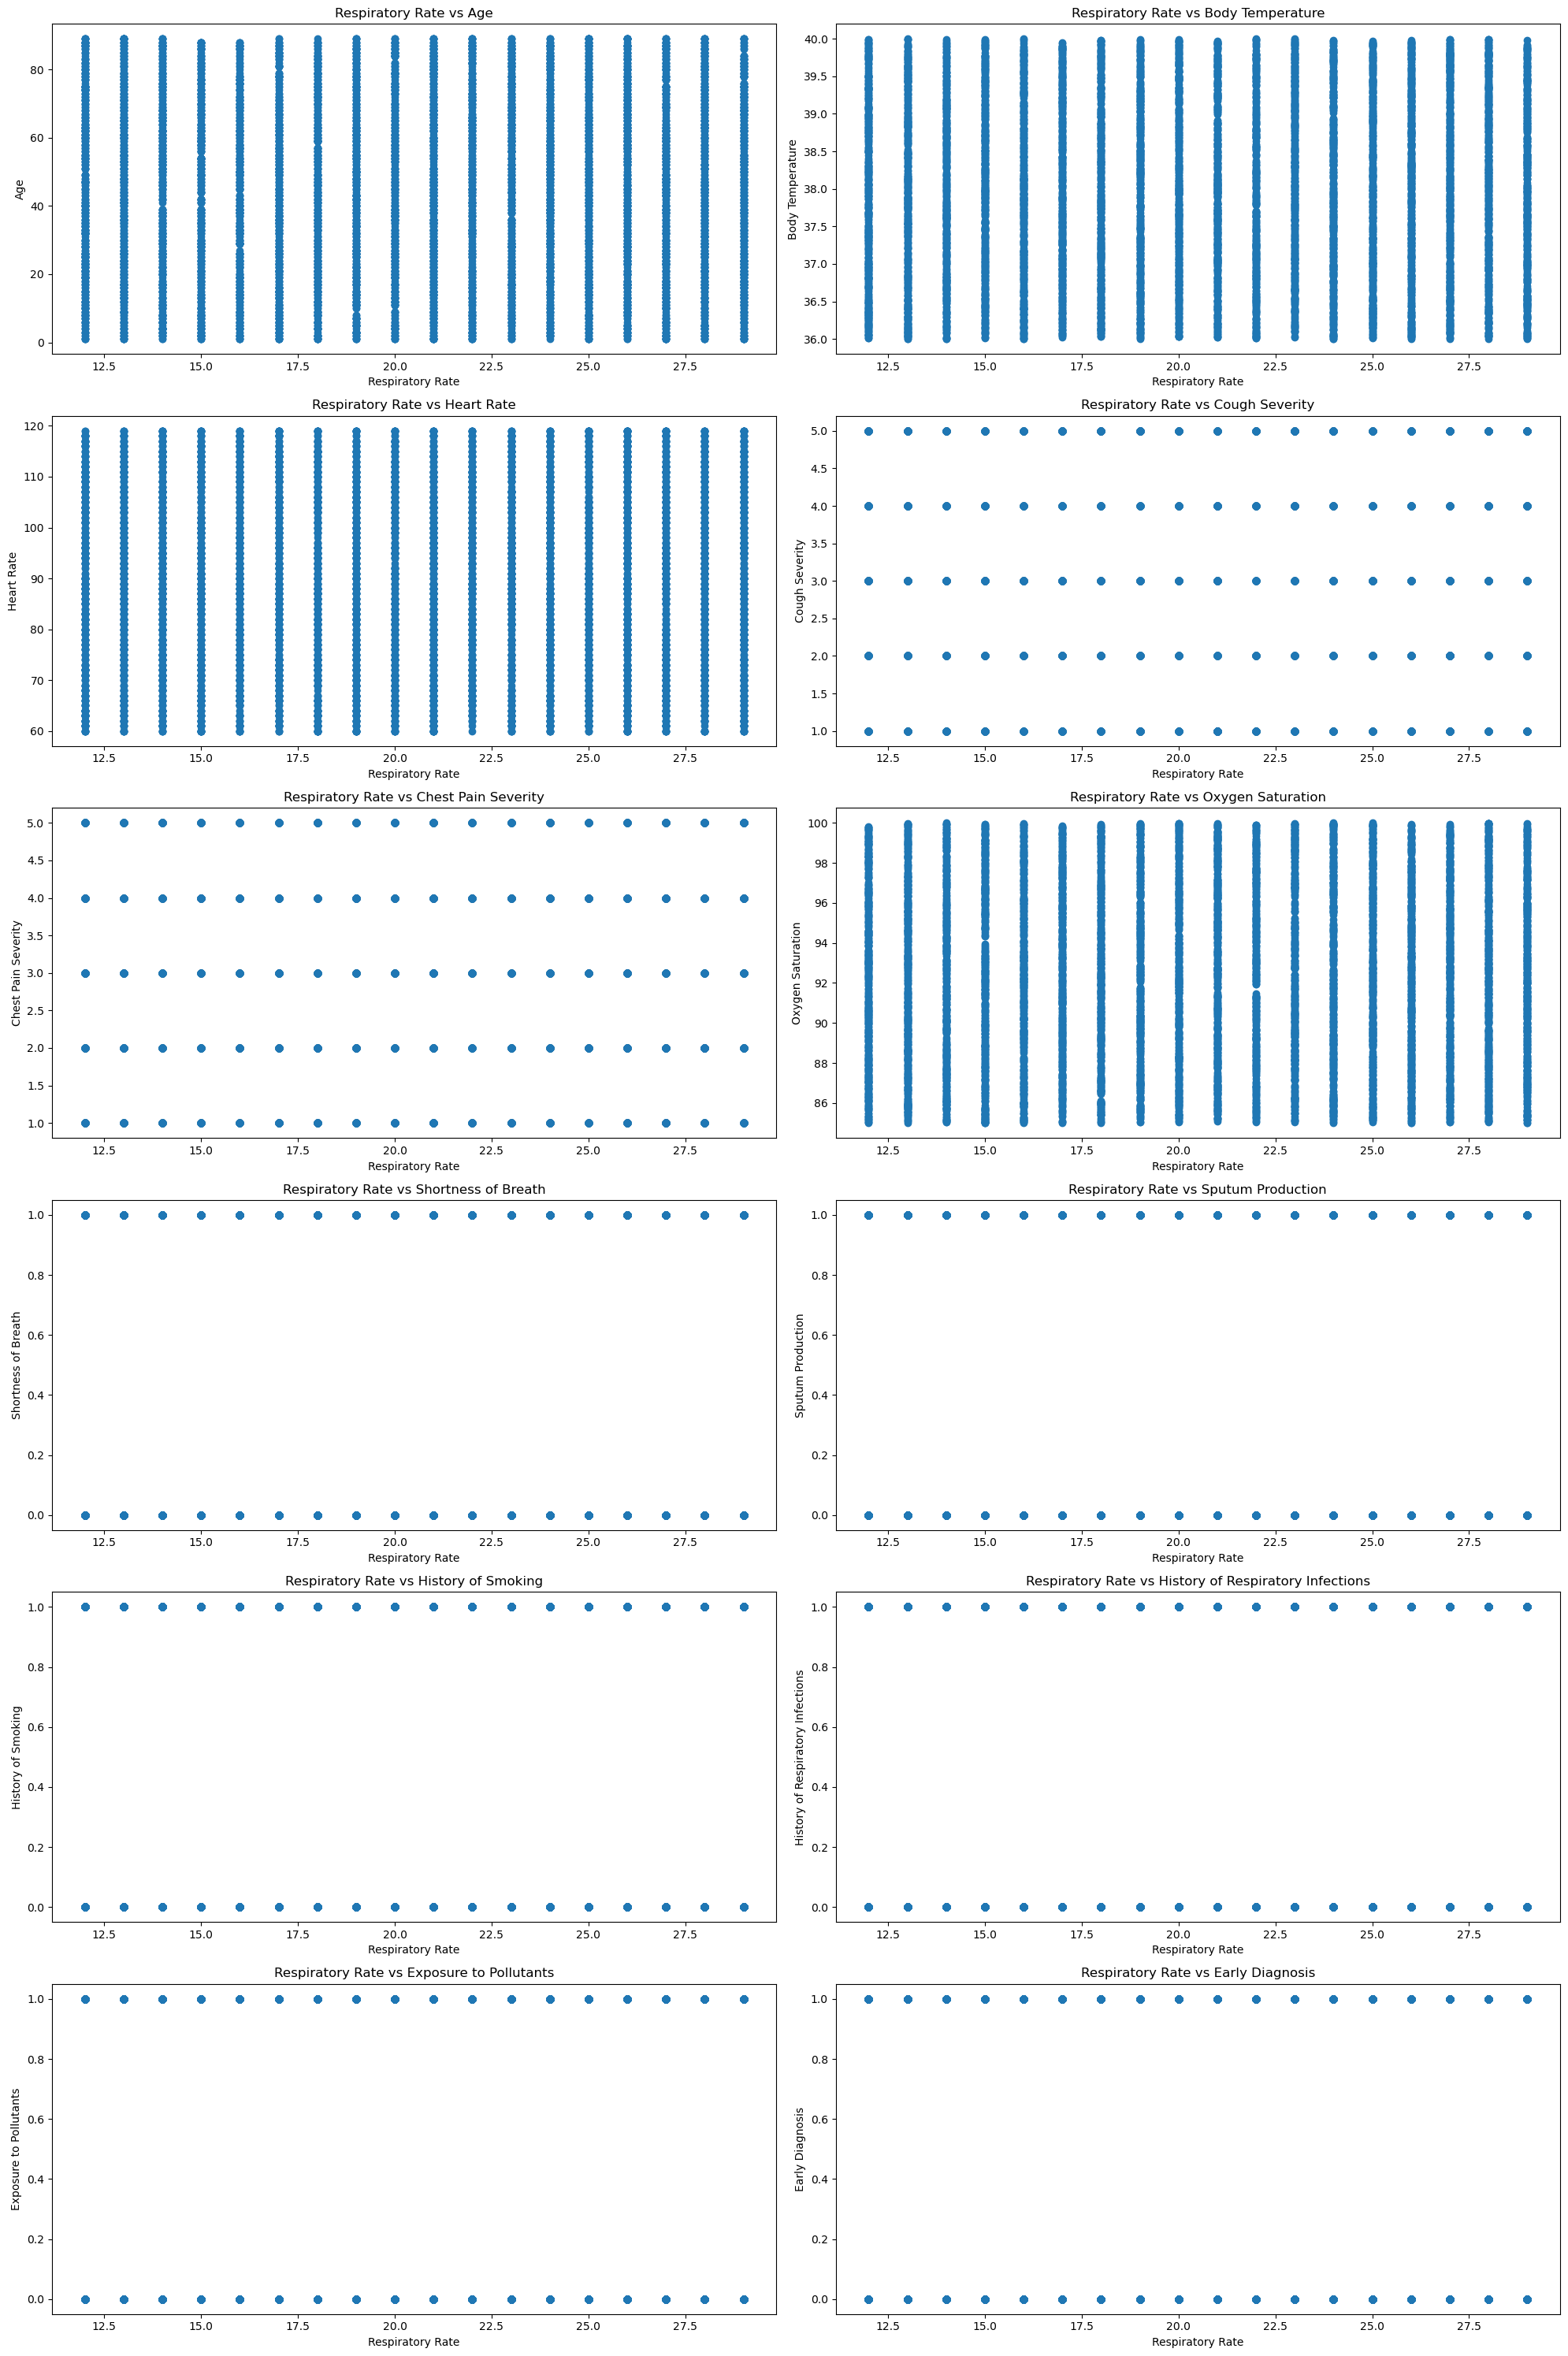

In [11]:
# Scatter plots with respiratory rate
if 'Respiratory Rate' in df.columns:
    features = [col for col in df.columns if col != 'Respiratory Rate']
    num_features = len(features)
    num_rows = math.ceil(num_features / 2)

    plt.figure(figsize=(20, 5 * num_rows))

    for i, feature in enumerate(features, 1):
        plt.subplot(num_rows, 2, i)
        plt.scatter(df['Respiratory Rate'], df[feature])
        plt.xlabel('Respiratory Rate')
        plt.ylabel(feature)
        plt.title(f'Respiratory Rate vs {feature}')

    plt.tight_layout()
    plt.savefig('scatter_plots.png')
    plt.show()

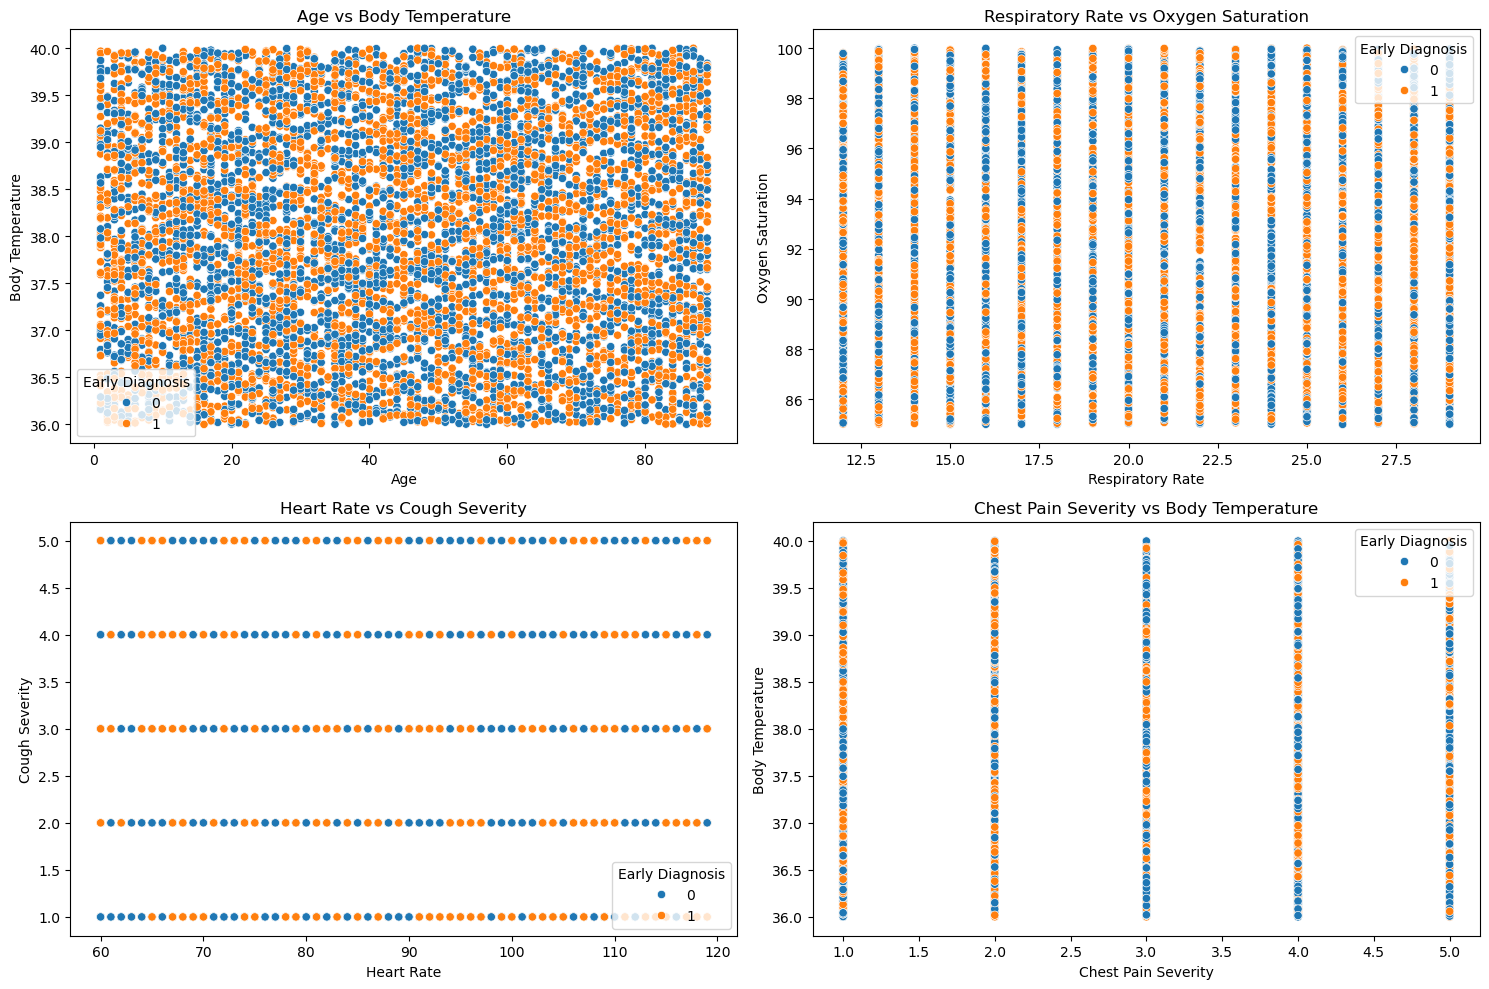

In [12]:
# Scatter plots of key features
plt.figure(figsize=(15, 10))

# Age vs Body Temperature colored by Early Diagnosis
plt.subplot(2, 2, 1)
sns.scatterplot(x='Age', y='Body Temperature', hue='Early Diagnosis', data=df)
plt.title('Age vs Body Temperature')

# Respiratory Rate vs Oxygen Saturation colored by Early Diagnosis
plt.subplot(2, 2, 2)
sns.scatterplot(x='Respiratory Rate', y='Oxygen Saturation', hue='Early Diagnosis', data=df)
plt.title('Respiratory Rate vs Oxygen Saturation')

# Heart Rate vs Cough Severity colored by Early Diagnosis
plt.subplot(2, 2, 3)
sns.scatterplot(x='Heart Rate', y='Cough Severity', hue='Early Diagnosis', data=df)
plt.title('Heart Rate vs Cough Severity')

# Chest Pain Severity vs Body Temperature colored by Early Diagnosis
plt.subplot(2, 2, 4)
sns.scatterplot(x='Chest Pain Severity', y='Body Temperature', hue='Early Diagnosis', data=df)
plt.title('Chest Pain Severity vs Body Temperature')

plt.tight_layout()
plt.savefig('scatter_plots_1.png')
plt.show()

In [13]:
# Calculate skewness
skewness = df.skew()
print("\nSkewness of features:")
print(skewness)


Skewness of features:
Age                                  0.024329
Body Temperature                     0.025957
Respiratory Rate                    -0.012655
Heart Rate                           0.013403
Cough Severity                      -0.025674
Chest Pain Severity                 -0.005017
Oxygen Saturation                    0.037167
Shortness of Breath                  0.026294
Sputum Production                   -0.013146
History of Smoking                  -0.010860
History of Respiratory Infections   -0.012003
Exposure to Pollutants              -0.028009
Early Diagnosis                     -0.002858
dtype: float64


In [14]:
# Perform Shapiro-Wilk test for normality
normality_tests = {}
for column in data.columns:
    stat, p = stats.shapiro(data[column])
    normality_tests[column] = {'statistic': stat, 'p-value': p}

print("\nShapiro-Wilk test results:")
print(pd.DataFrame(normality_tests).T)


Shapiro-Wilk test results:
                                   statistic       p-value
Age                                 0.955685  1.024489e-41
Body Temperature                    0.955763  1.090911e-41
Respiratory Rate                    0.945747  5.605194e-45
Heart Rate                          0.955115  6.469795e-42
Cough Severity                      0.886845  0.000000e+00
Chest Pain Severity                 0.888393  0.000000e+00
Oxygen Saturation                   0.956027  1.352673e-41
Shortness of Breath                 0.636595  0.000000e+00
Sputum Production                   0.636638  0.000000e+00
History of Smoking                  0.636580  0.000000e+00
History of Respiratory Infections   0.636686  0.000000e+00
Exposure to Pollutants              0.636580  0.000000e+00
Early Diagnosis                     0.636644  0.000000e+00


In [15]:
# Save summary statistics to a file
with open('eda_summary.txt', 'w') as f:
    f.write("Dataset Information:\n")
    data.info(buf=f)
    f.write("\n\nBasic Statistics:\n")
    data.describe().to_string(buf=f)
    f.write("\n\nSkewness of features:\n")
    skewness.to_string(buf=f)
    f.write("\n\nShapiro-Wilk test results:\n")
    pd.DataFrame(normality_tests).T.to_string(buf=f)